In [1]:

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 



<br>
<br>

# `#01: Bisection Method:`

<br>
<br>

In [42]:


df = pd.DataFrame(columns=["a","b","fn(a)","fn(b)","c=(a+b)/2","f(c)"])

def fn(x):
    #return 3*x - np.cos(x) - 1 
    return x**2 -2 

def bisection(a,b,i,tol=1e-6):
    if (fn(a)*fn(b)) >= 0:
        print("choose the another value of a,b")
        return 
    
    c = (a+b)/2 
    
    #val:
    val = {"a":a,"b":b,"fn(a)":fn(a),"fn(b)":fn(b),"c=(a+b)/2":c,"f(c)":fn(c)}
    df.loc[i] = val 
    
    if (a==b) or abs(a-b)<tol or abs(c)<tol:
        return c
    elif fn(a)*fn(c)<=0:
        return bisection(a=a,b=c,i=i+1)
    else:
        return bisection(a=c,b=b,i=i+1)
    
a = 1
b = 2
i = 1
ans = bisection(a,b,i)
ans 

1.4142136573791504

In [43]:
df

,a,b,fn(a),fn(b),c=(a+b)/2,f(c)
1,1.000000,2.000000,-1.000000,2.000000,1.500000,2.500000e-01
2,1.000000,1.500000,-1.000000,0.250000,1.250000,-4.375000e-01
3,1.250000,1.500000,-0.437500,0.250000,1.375000,-1.093750e-01
4,1.375000,1.500000,-0.109375,0.250000,1.437500,6.640625e-02
5,1.375000,1.437500,-0.109375,0.066406,1.406250,-2.246094e-02
6,1.406250,1.437500,-0.022461,0.066406,1.421875,2.172852e-02
7,1.406250,1.421875,-0.022461,0.021729,1.414062,-4.272461e-04
8,1.414062,1.421875,-0.000427,0.021729,1.417969,1.063538e-02
9,1.414062,1.417969,-0.000427,0.010635,1.416016,5.100250e-03
10,1.414062,1.416016,-0.000427,0.005100,1.415039,2.335548e-03


In [44]:
df.index

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21],
      dtype='int64')

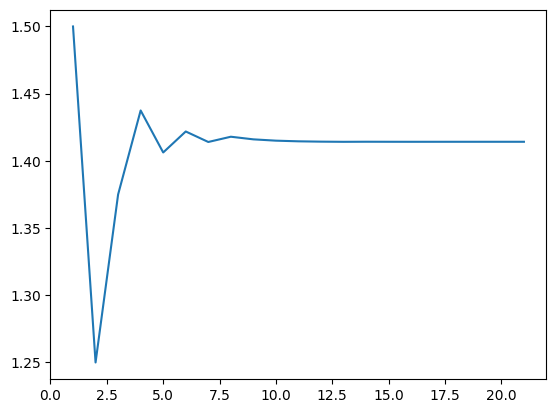

In [45]:


plt.plot(df.index,df["c=(a+b)/2"])


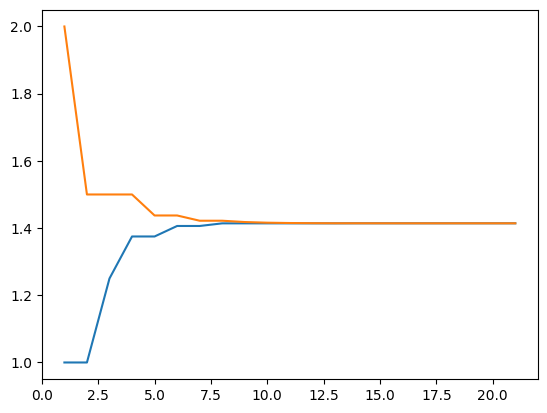

In [46]:

plt.plot(df.index,df["a"])
plt.plot(df.index,df["b"])


<br>
<br>

# `#02: False Position Method:`

<br>
<br>

In [47]:



df = pd.DataFrame(columns=["a","b","fn(a)","fn(b)","((b*fn(b))- (a*fn(a)))/(fn(b) - fn(a))","f(c)"])


def fn(x):
    #return x**2 -2 
    return 3*x - np.cos(x) - 1 

def bisection(a,b,i,tol=1e-6):
    if (fn(a)*fn(b)) >= 0:
        print("choose the another value of a,b")
        return 
    
    c = ((b*fn(b))- (a*fn(a)))/(fn(b) - fn(a))
    
    #val:
    val = {"a":a,"b":b,"fn(a)":fn(a),"fn(b)":fn(b),
           "((b*fn(b))- (a*fn(a)))/(fn(b) - fn(a))":c,"f(c)":fn(c)}
    df.loc[i] = val 
    
    if (a==b) or abs(a-b)<tol or abs(c)<tol:
        return c
    elif fn(a)*fn(c)<=0:
        return bisection(a=a,b=c,i=i+1)
    else:
        return bisection(a=c,b=b,i=i+1)
    
a = 0
b = 1
i = 1
ans = bisection(a,b,i)
ans.item()

0.6071017106443578

In [48]:

df 

,a,b,fn(a),fn(b),((b*fn(b))- (a*fn(a)))/(fn(b) - fn(a)),f(c)
1,0.000000,1.000000,-2.000000,1.459698,0.421915,-6.465621e-01
2,0.421915,1.000000,-0.646562,1.459698,0.822544,7.872739e-01
3,0.421915,0.822544,-0.646562,0.787274,0.641888,1.246962e-01
4,0.421915,0.641888,-0.646562,0.124696,0.457480,-5.247291e-01
5,0.457480,0.641888,-0.524729,0.124696,0.492888,-4.023061e-01
...,...,...,...,...,...,...
109,0.607099,0.607102,-0.000008,0.000002,0.607100,-6.336906e-06
110,0.607100,0.607102,-0.000006,0.000002,0.607100,-4.696854e-06
111,0.607100,0.607102,-0.000005,0.000002,0.607101,-3.056802e-06
112,0.607101,0.607102,-0.000003,0.000002,0.607101,-1.416749e-06


(1.0, 20.0)

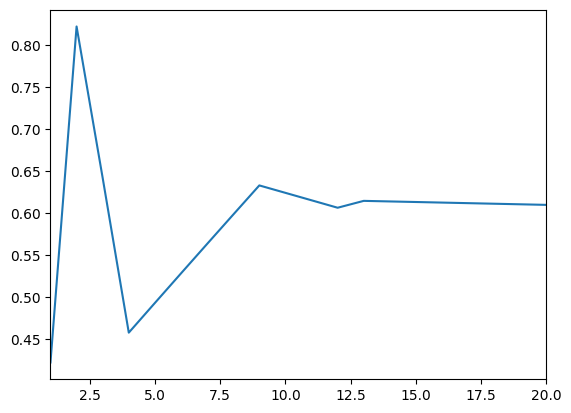

In [49]:

plt.plot(df.index,df["((b*fn(b))- (a*fn(a)))/(fn(b) - fn(a))"])
plt.xlim(1,20)

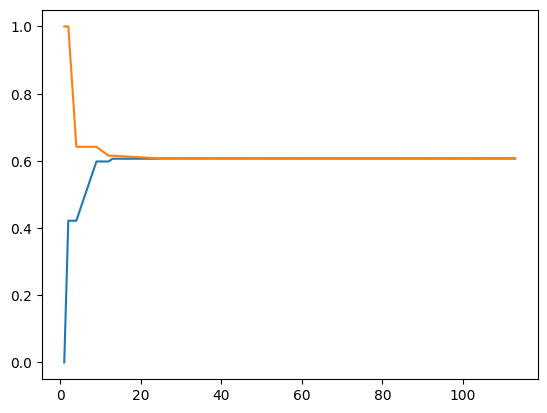

In [50]:

plt.plot(df.index,df["a"])
plt.plot(df.index,df["b"])



<br>
<br>

# `#03 One Point Iteration Method:`

<br>
<br>

In [51]:

df = pd.DataFrame(columns=["x_val"])

# given equation: f(x) = X^3 - 4X + 1 = 0 then,
# x = (X^3 +1)/4 
def fx(x):
    return x**3 - 4*x + 1 

def gx(x):
    return (x**3 +1 )/4 


def iteration_method(x0,tolerance=1e-6,max_iteration=1000):
    x = x0 
    for i in range(max_iteration):
        x_new = gx(x)
        if abs(x_new-x)<tolerance:
            return x_new
        df.loc[i+1] = {"x_val":x_new}
        x = x_new 
    return 

# initial value:
x0 = 0.5 
ans = iteration_method(x0=x0)
ans 

0.2541016964433702

In [52]:
df

,x_val
1,0.281250
2,0.255562
3,0.254173
4,0.254105
5,0.254102


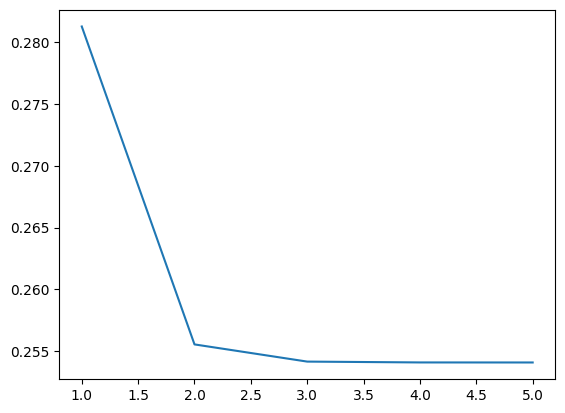

In [53]:

plt.plot(df.index,df["x_val"])

<br>
<br>

# `#04 Gauss-Ellimination:`

<br>
<br>

In [54]:


def gaussEllimination(coefficient,y_matrix):
    pass 


A = np.array([[1, 1, 3], [0, 1, 3], [-1, 3, 0]], dtype=np.float64) 
b = np.array([[1], [3], [5]], dtype=np.float64)  
A,b

(array([[ 1.,  1.,  3.],
        [ 0.,  1.,  3.],
        [-1.,  3.,  0.]]),
 array([[1.],
        [3.],
        [5.]]))

In [55]:
aug  = np.concatenate((A,b),axis=1)
aug

array([[ 1.,  1.,  3.,  1.],
       [ 0.,  1.,  3.,  3.],
       [-1.,  3.,  0.,  5.]])

In [56]:
n = 3 
x = np.zeros(3)
x

array([0., 0., 0.])

In [57]:
x[n-1] = aug[n-2][1]

In [58]:
A.shape,b.shape

((3, 3), (3, 1))

In [59]:
for i in range(1,-1,-1):
    print(i)

1
0


In [60]:


def gaussEllimination(A,b):
    
    if A.shape[0]!=A.shape[1] or b.shape[1]>1 or  b.shape[0] != A.shape[0]:
        print("Invalid Matrix")
        return 
    
    # important variable: 
    n = b.shape[0] #3
    x = np.zeros(n)
    aug = np.concatenate((A,b),axis=1).astype(np.float64)
    
    
    #forward subtutituion:
    for i in range(n):
        povit = aug[i][i]
        if povit == 0:
            print("can't divide with zero")
            return
        for j in range(i+1,n):
            scaling = aug[j][i] / povit
            aug[j] -= scaling*aug[i]
        print()
        print(aug)
    
    # backward subtitution:
    x[n-1] = aug[n-1][n]/aug[n-1][n-1] # value of z 
    
    for k in range(n-2,-1,-1):
        #sum_terms = sum(aug[k][j]*x[j] for j in range(k+1,n))
        sum_terms = 0
        for j in range(k+1,n):
            sum_terms += aug[k][j] *x[j]
            
        x[k] = (aug[k][n] - sum_terms) / aug[k][k]
    print("\n solution: ",x)
    
A = np.array([[1, 1, 3], [0, 1, 3], [-1, 3, 0]], dtype=np.float64) 
b = np.array([[1], [3], [5]], dtype=np.float64)  
gaussEllimination(A, b)



[[1. 1. 3. 1.]
 [0. 1. 3. 3.]
 [0. 4. 3. 6.]]

[[ 1.  1.  3.  1.]
 [ 0.  1.  3.  3.]
 [ 0.  0. -9. -6.]]

[[ 1.  1.  3.  1.]
 [ 0.  1.  3.  3.]
 [ 0.  0. -9. -6.]]

 solution:  [-2.          1.          0.66666667]


In [61]:
-6/-9

0.6666666666666666

<br>
<br>

# `#05 Gauss-Jordan-Elimination:`

<br>
<br>

In [62]:


import numpy as np

def gaussJordanElimination(A, b):
    if A.shape[0] != A.shape[1] or b.shape[1] > 1 or b.shape[0] != A.shape[0]:
        print("Invalid Matrix")
        return 
    
    # important variable: 
    n = b.shape[0]
    x = np.zeros(n)
    aug = np.concatenate((A, b), axis=1).astype(np.float64)
    
    # Full Elimination (নিচে + উপরে 0 কর, pivot 1 কর)
    for i in range(n):
        pivot = aug[i][i]
        if pivot == 0:
            print("Can't divide with zero")
            return
        
        # Normalize pivot row (pivot = 1 কর)
        aug[i] /= pivot  # পুরো row-কে pivot দিয়ে divide কর
        print("\nAfter normalizing row", i, ":\n", aug)
        
        # Eliminate column i (নিচে + উপরে 0 কর)
        for j in range(n):
            if j != i:  # Skip pivot row
                scaling = aug[j][i] / aug[i][i]  # aug[i][i] এখন 1, তাই scaling = aug[j][i]
                aug[j] -= scaling * aug[i]
        print("\nAfter eliminating column", i, ":\n", aug)
    
    # Solution সরাসরি নে
    for i in range(n):
        x[i] = aug[i][n]  # শেষ column থেকে x, y, z নে
    
    print("\nSolution: ", x)

# Test
A = np.array([[1, 1, 3], [0, 1, 3], [-1, 3, 0]], dtype=np.float64)
b = np.array([[1], [3], [5]], dtype=np.float64)
gaussJordanElimination(A, b)


After normalizing row 0 :
 [[ 1.  1.  3.  1.]
 [ 0.  1.  3.  3.]
 [-1.  3.  0.  5.]]

After eliminating column 0 :
 [[1. 1. 3. 1.]
 [0. 1. 3. 3.]
 [0. 4. 3. 6.]]

After normalizing row 1 :
 [[1. 1. 3. 1.]
 [0. 1. 3. 3.]
 [0. 4. 3. 6.]]

After eliminating column 1 :
 [[ 1.  0.  0. -2.]
 [ 0.  1.  3.  3.]
 [ 0.  0. -9. -6.]]

After normalizing row 2 :
 [[ 1.          0.          0.         -2.        ]
 [ 0.          1.          3.          3.        ]
 [-0.         -0.          1.          0.66666667]]

After eliminating column 2 :
 [[ 1.          0.          0.         -2.        ]
 [ 0.          1.          0.          1.        ]
 [-0.         -0.          1.          0.66666667]]

Solution:  [-2.          1.          0.66666667]


<br>
<br>

# `#06 Linear Regression:`

<br>
<br>

In [2]:
import random
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

random.seed(42)

X,y = make_regression(n_samples=100,n_features=1,noise=20,random_state=42)


In [3]:

# train=80%,test=20

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8)


In [4]:

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (80, 1)
y_train shape: (80,)
X_test shape: (20, 1)
y_test shape: (20,)


In [5]:

model = SGDRegressor(loss="squared_error",alpha=0.001,verbose=True)
model.fit(X_train,y_train)


-- Epoch 1
Norm: 12.49, NNZs: 1, Bias: -0.570545, T: 80, Avg. loss: 819.617488
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 18.72, NNZs: 1, Bias: -0.590324, T: 160, Avg. loss: 572.381041
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 23.26, NNZs: 1, Bias: -0.424872, T: 240, Avg. loss: 444.544343
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 26.85, NNZs: 1, Bias: -0.216675, T: 320, Avg. loss: 363.342082
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 29.74, NNZs: 1, Bias: 0.011450, T: 400, Avg. loss: 308.052736
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 32.11, NNZs: 1, Bias: 0.238695, T: 480, Avg. loss: 269.345439
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 34.08, NNZs: 1, Bias: 0.483180, T: 560, Avg. loss: 241.510577
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 35.75, NNZs: 1, Bias: 0.704617, T: 640, Avg. loss: 221.080477
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 37.17, NNZs: 1, Bias: 0.924403, T: 720, Avg. loss: 205.811726
Total 

,loss,'squared_error'
,penalty,'l2'
,alpha,0.001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,True
,epsilon,0.1
,random_state,None


In [6]:

y_pred = model.predict(X_test)
r2_score(y_test,y_pred)

0.8228888420424775

In [36]:

x_line = np.linspace(-4,5,100)
y_line = model.predict(x_line.reshape(-1,1))

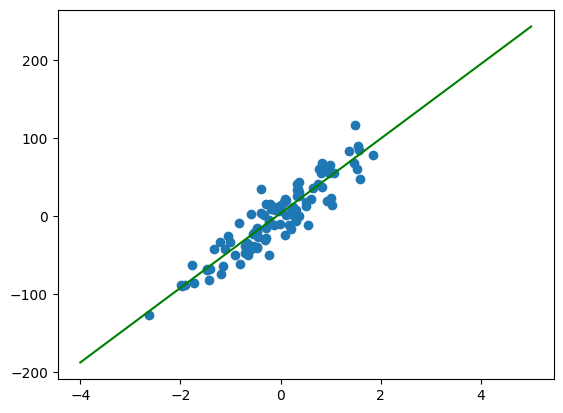

In [38]:

plt.plot(x_line,y_line,c="green")
plt.scatter(x=X,y=y)

<br>
<br>

# `#07 Multiple Linear Regression:`

<br>
<br>

<br>
<br>

# `#08 Logistics Regression:`

<br>
<br>

In [79]:

from sklearn.datasets import make_classification